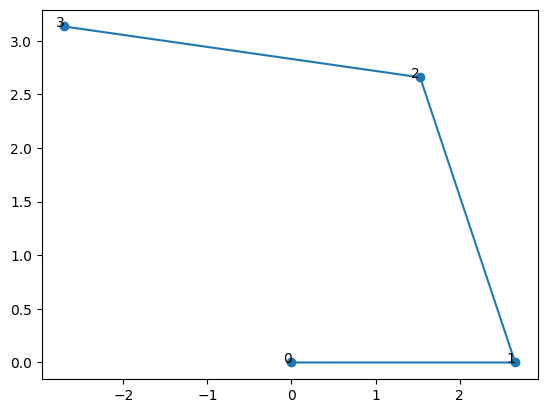

not crossed


In [4]:
import random

import matplotlib.pyplot as plt
import numpy as np


def generate_points(min: float, sum: float) -> list[np.ndarray]:
    origin: np.ndarray = np.array([0, 0])
    randoms: list[float] = [1, 1, 1]
    angles: list[float] = [0.2, 0.2]
    for i in range(3):
        randoms_seed: float = random.uniform(0, 1)
        randoms[i] = randoms_seed * (sum - min) + min
    for i in range(2):
        angle_seed: float = random.uniform(0, 1)
        angles[i] = angle_seed * np.pi
    p0: np.ndarray = origin
    p1: np.ndarray = np.array([origin[0] + randoms[0], origin[1]])
    p2: np.ndarray = np.array(
        [
            p1[0] + randoms[1] * np.cos(angles[0]),
            p1[1] + randoms[1] * np.sin(angles[0]),
        ]
    )
    p3: np.ndarray = np.array(
        [
            p2[0] + randoms[2] * np.cos(angles[0] + angles[1]),
            p2[1] + randoms[2] * np.sin(angles[0] + angles[1]),
        ]
    )
    points: list[np.ndarray] = [p0, p1, p2, p3]

    return points


def calculate_vectors(points: list[np.ndarray]) -> tuple[np.ndarray, np.ndarray]:
    v01: np.ndarray = points[1] - points[0]
    v23: np.ndarray = points[3] - points[2]
    return v01, v23


def check_intersection(points: list[np.ndarray], vectors: list[np.ndarray]) -> tuple[float, float]:
    result: np.ndarray = np.linalg.solve(
        np.vstack((vectors[0], -vectors[1])).T, points[2] - points[0]
    )
    s: float = result[0]
    t: float = result[1]

    return s, t


def is_parallel(cos_theta: float) -> bool:
    cos_pi: float = 0.999
    return np.abs(cos_theta) >= cos_pi


def check_conditions(points: list[np.ndarray], ss: float, tt: float) -> str:
    MIN: float = 2.2
    if np.linalg.norm(points[0] - points[3]) < MIN:
        return "False0-3"
    if np.linalg.norm(points[0] - points[2]) < MIN:
        return "False0-2"
    if np.linalg.norm(points[1] - points[3]) < MIN:
        return "False1-3"
    if 0 < ss < 1 and 0 < tt < 1:
        return "crossed"
    else:
        return "not crossed"


def plot_points(points: list[np.ndarray]) -> None:
    plt.figure()
    plt.plot(*zip(*points), marker="o")
    for i, p in enumerate(points):
        plt.text(p[0], p[1], str(i), ha="right")
    plt.show()


def main() -> None:
    MIN: float = 2.2
    SUM: float = 5.8
    points: list[np.ndarray] = generate_points(MIN, SUM)

    v01, v23 = calculate_vectors(points)
    vectors: list[np.ndarray] = [v01, v23]

    result: tuple[float, float] = check_intersection(points, vectors)
    s: float = result[0]
    t: float = result[1]

    cos_theta: float = np.dot(vectors[0], vectors[1]) / (np.linalg.norm(vectors[0]) * np.linalg.norm(vectors[1]))
    if is_parallel(cos_theta):
        s = 10
        t = 10

    condition: str = check_conditions(points, s, t)
    if condition == "not crossed":
        plot_points(points)
        print(condition)
    elif condition == "crossed":
        plot_points(points)
        print(condition)
    else:
        print(condition)


if __name__ == "__main__":
    main()
